In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


# Load the dataset
data = pd.read_csv("Frogs_MFCCs.csv", delimiter=",")

# Extract numeric variables, assuming the last 4 columns are non-numeric
# The first part of the data up to the second last 4 columns is numeric
numeric_data = data.iloc[:, :-4]  # Excluding the last 4 columns

data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [2]:
numeric_data 

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.153120,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895


In [3]:
data.columns

Index(['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'Family', 'Genus',
       'Species', 'RecordID'],
      dtype='object')

We have 
* 22 Numeric variables: 22 Mel-frequency cepstral coefficients (MFCCs), such as 'MFCCs_1', 'MFCCs_2', ..., 'MFCCs_22'.
* 4 Categorical variables: 'Family', 'Genus', 'Species', and 'RecordID'; but only consider 'Family', 'Genus', 'Species'.

## **1. Can we reduce our number of numeric variables?**
  
Yes, applying Principal Component Analysis (PCA) shows that the dataset's dimensionality can be reduced. 
- By retaining 95% of the variance in the data, we only need **12** principal components instead of the original 22 numeric variables.   
- Using only the first two principal components (PC1 and PC2), which explain 48% of the variance, is not sufficient for our analysis. 

In [4]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# PCA Analysis
pca = PCA()
pca.fit(scaled_data)

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Eigenvalues and Eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

#### Eigenvalue Table:

In [5]:
# Eigenvalue table
eigenvalue_table = pd.DataFrame({
    'Eigenvalue': eigenvalues,
    'Difference': np.append(np.diff(eigenvalues), np.nan),
    'Proportion': explained_variance,
    'Cumulative': cumulative_explained_variance
})

# Display results
print("Eigenvalue Table:\n")
eigenvalue_table

Eigenvalue Table:



,Eigenvalue,Difference,Proportion,Cumulative
0,7.658106,-4.358020,0.348047,0.348047
1,3.300086,-0.802162,0.149983,0.498030
2,2.497924,-0.771834,0.113526,0.611557
3,1.726090,-0.208774,0.078448,0.690004
4,1.517316,-0.514408,0.068959,0.758964
5,1.002908,-0.152296,0.045580,0.804544
6,0.850612,-0.043217,0.038659,0.843203
7,0.807395,-0.134626,0.036695,0.879898
8,0.672769,-0.279161,0.030576,0.910474
9,0.393608,-0.070939,0.017889,0.928363


#### Eigenvectors Table:

In [6]:
# Create the columns names to match the size
columns = ['Prin' + str(i) for i in range(1, len(numeric_data.columns) + 1)] 
# Convert to DataFrame

# Convert to DataFrame
eigenvectors_table = pd.DataFrame(eigenvectors.T, columns = columns,index = numeric_data.columns)  

# Display results   
print("Eigenvectors Table:\n")
eigenvectors_table


Eigenvectors Table:



,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,...,Prin13,Prin14,Prin15,Prin16,Prin17,Prin18,Prin19,Prin20,Prin21,Prin22
MFCCs_ 1,0.047862,-0.136431,-0.107571,0.213729,0.298855,0.528436,0.433590,-0.228509,0.524429,0.114836,...,0.100977,0.043633,0.008692,0.063028,-0.019694,0.025095,-0.025109,-0.009994,-0.001683,-0.001472
MFCCs_ 2,-0.080052,0.285343,0.263209,-0.064710,-0.056782,-0.427995,0.032490,-0.147573,0.563303,0.279804,...,-0.290140,-0.054425,-0.037272,-0.199279,0.018312,0.129168,-0.049061,0.005708,0.033468,-0.016081
MFCCs_ 3,-0.118025,0.340518,0.288283,-0.008045,-0.319673,-0.004162,0.221385,0.132654,0.146874,-0.081599,...,0.039415,0.076744,0.068597,0.619068,-0.097801,-0.330471,0.156074,0.036927,-0.054204,0.014389
MFCCs_ 4,0.237355,0.031572,0.141366,0.132488,-0.011698,-0.201627,0.442022,0.427361,-0.161887,0.100987,...,0.332955,0.204948,-0.109788,-0.170050,-0.000004,0.178318,-0.116328,-0.051216,0.033735,0.001428
MFCCs_ 5,0.144251,-0.247326,-0.329895,-0.197261,0.289712,-0.173329,-0.056923,0.186758,0.037521,0.235099,...,-0.272523,0.269655,0.116400,0.216810,-0.045349,-0.318431,0.333042,0.130579,-0.034749,-0.002036
MFCCs_ 6,-0.200754,0.028274,-0.208234,-0.280691,-0.348948,0.175275,-0.277724,-0.176909,0.048191,0.348591,...,0.155289,0.400552,0.130860,0.008288,-0.014595,0.123314,-0.274670,-0.151429,-0.007789,0.004270
MFCCs_ 7,-0.258680,0.053149,0.197647,0.328021,-0.162884,0.183226,-0.111135,-0.173771,-0.097719,-0.066841,...,0.153112,0.288032,0.140520,-0.320071,-0.016465,-0.086562,0.465913,0.341608,0.073377,0.018635
MFCCs_ 8,0.148230,0.224303,0.239650,0.148644,0.456637,-0.142001,-0.095673,-0.232443,-0.113134,-0.205694,...,-0.039782,0.434482,0.424446,0.047533,-0.020844,-0.029433,-0.212428,-0.253012,-0.113048,-0.034388
MFCCs_ 9,0.286679,0.065030,-0.044319,-0.332457,0.024224,-0.163850,0.154585,-0.167636,0.060215,-0.067693,...,0.069345,0.105200,0.192549,-0.100838,0.063183,0.216475,0.179391,0.474299,0.319790,0.128256
MFCCs_10,-0.093223,-0.393072,-0.101433,0.052891,-0.344536,-0.208201,0.255283,0.139434,0.195856,-0.117947,...,-0.010942,0.063871,0.465814,-0.245013,0.186574,-0.105962,0.068606,-0.206284,-0.258206,-0.138995


#### Display the contribution of variance for each principal component:

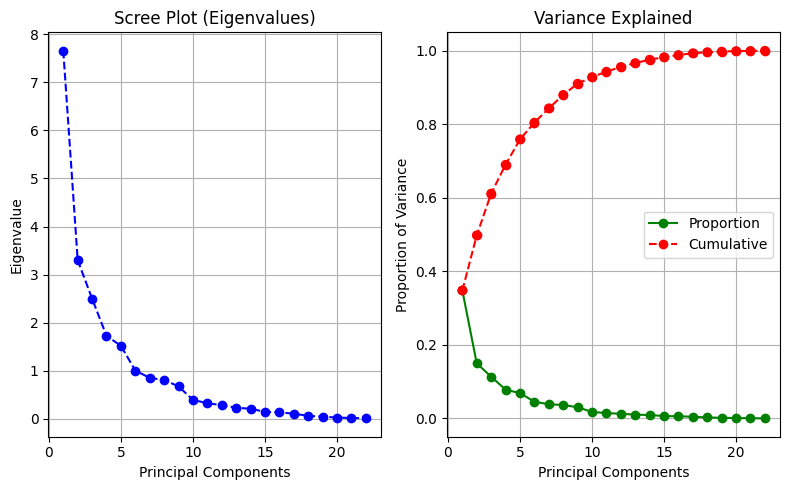

,Principal Component,Proportion of Variance,Cumulative Variance
0,PC1,0.348047,0.348047
1,PC2,0.149983,0.498030
2,PC3,0.113526,0.611557
3,PC4,0.078448,0.690004
4,PC5,0.068959,0.758964
5,PC6,0.045580,0.804544
6,PC7,0.038659,0.843203
7,PC8,0.036695,0.879898
8,PC9,0.030576,0.910474
9,PC10,0.017889,0.928363


In [9]:
# Scree Plot: Principal Components * Eigenvalue
plt.figure(figsize=(8, 5))

# Plot the eigenvalue per principal component (Scree Plot)
plt.subplot(1, 2, 1)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--', color='b')
plt.title('Scree Plot (Eigenvalues)')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue')
plt.grid(True)

# Variance Explained Plot: Proportion and Cumulative Proportion
# Calculate Proportion of Variance Explained
proportion_variance = explained_variance
cumulative_variance = np.cumsum(proportion_variance)

# Create a DataFrame to store the results
df_variance = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(proportion_variance))],
    'Proportion of Variance': proportion_variance,
    'Cumulative Variance': cumulative_variance
})

# Plot the variance explained and cumulative variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(proportion_variance) + 1), proportion_variance, marker='o', linestyle='-', color='g', label='Proportion')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='r', label='Cumulative')

# Plot hollow circles for cumulative variance (empty circles on the line)
plt.scatter(range(1, len(cumulative_variance) + 1), cumulative_variance, color='r', facecolors='none', edgecolor='r', zorder=5)

plt.title('Variance Explained')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance')
plt.legend()
plt.grid(True)
# Show both plots
plt.tight_layout()
plt.show()

# Display the table
df_variance

#### Component Pattern, Circle of Correlations

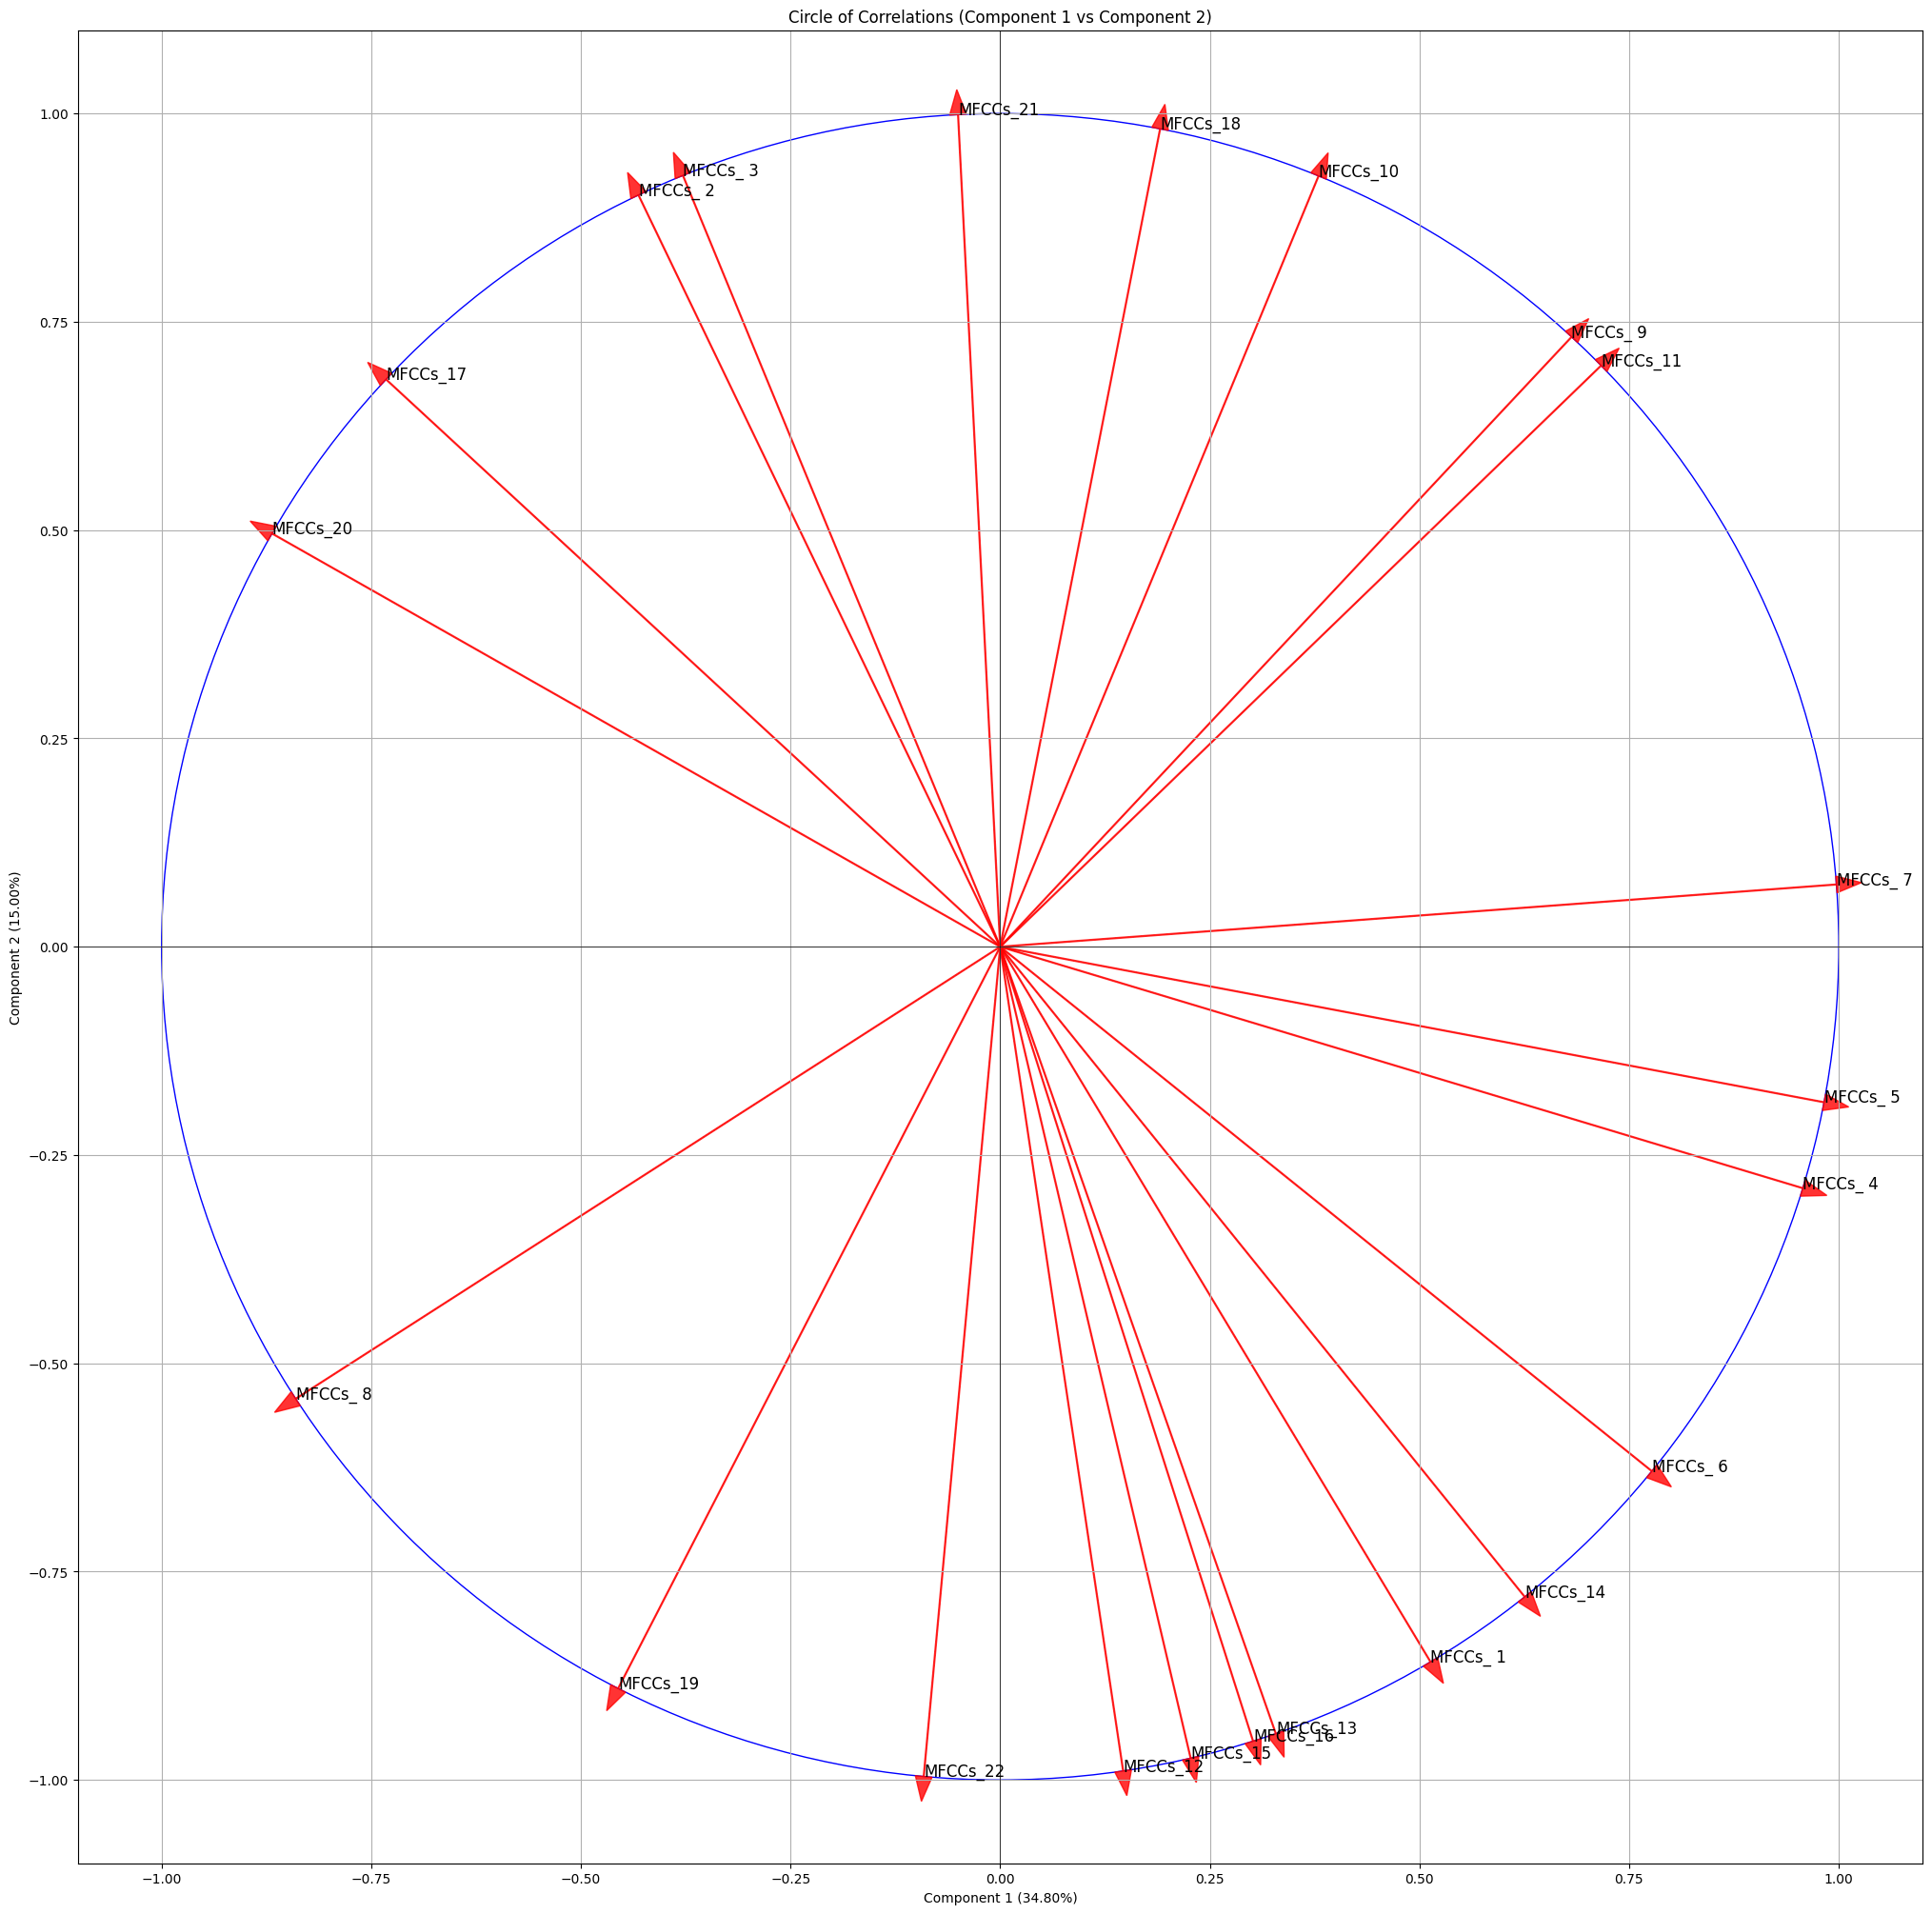

In [8]:
# Create a circle of radius 1
circle = plt.Circle((0, 0), 1, color='blue', fill=False)

# Plot the circle of correlations
fig, ax = plt.subplots(figsize=(25,25))
ax.add_artist(circle)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Plot the variables as vectors with increased length for the eigenvector magnitude
for i, (x, y) in enumerate(zip(eigenvectors[:, 0], eigenvectors[:, 1])):
    # Scale the arrows according to the magnitude of each eigenvector
    magnitude = np.sqrt(x**2 + y**2)
    plt.arrow(0, 0, x / magnitude, y / magnitude, color='red', alpha=0.8, head_width=0.02)  #这里是除以 / 比率magnitude，而不是乘以
    plt.text(x / magnitude, y / magnitude, numeric_data.columns[i], fontsize=12)

# Configure plot limits and labels
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel(f"Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.title("Circle of Correlations (Component 1 vs Component 2)")
plt.grid()

# Show the plot
plt.show()

#### Component Scores

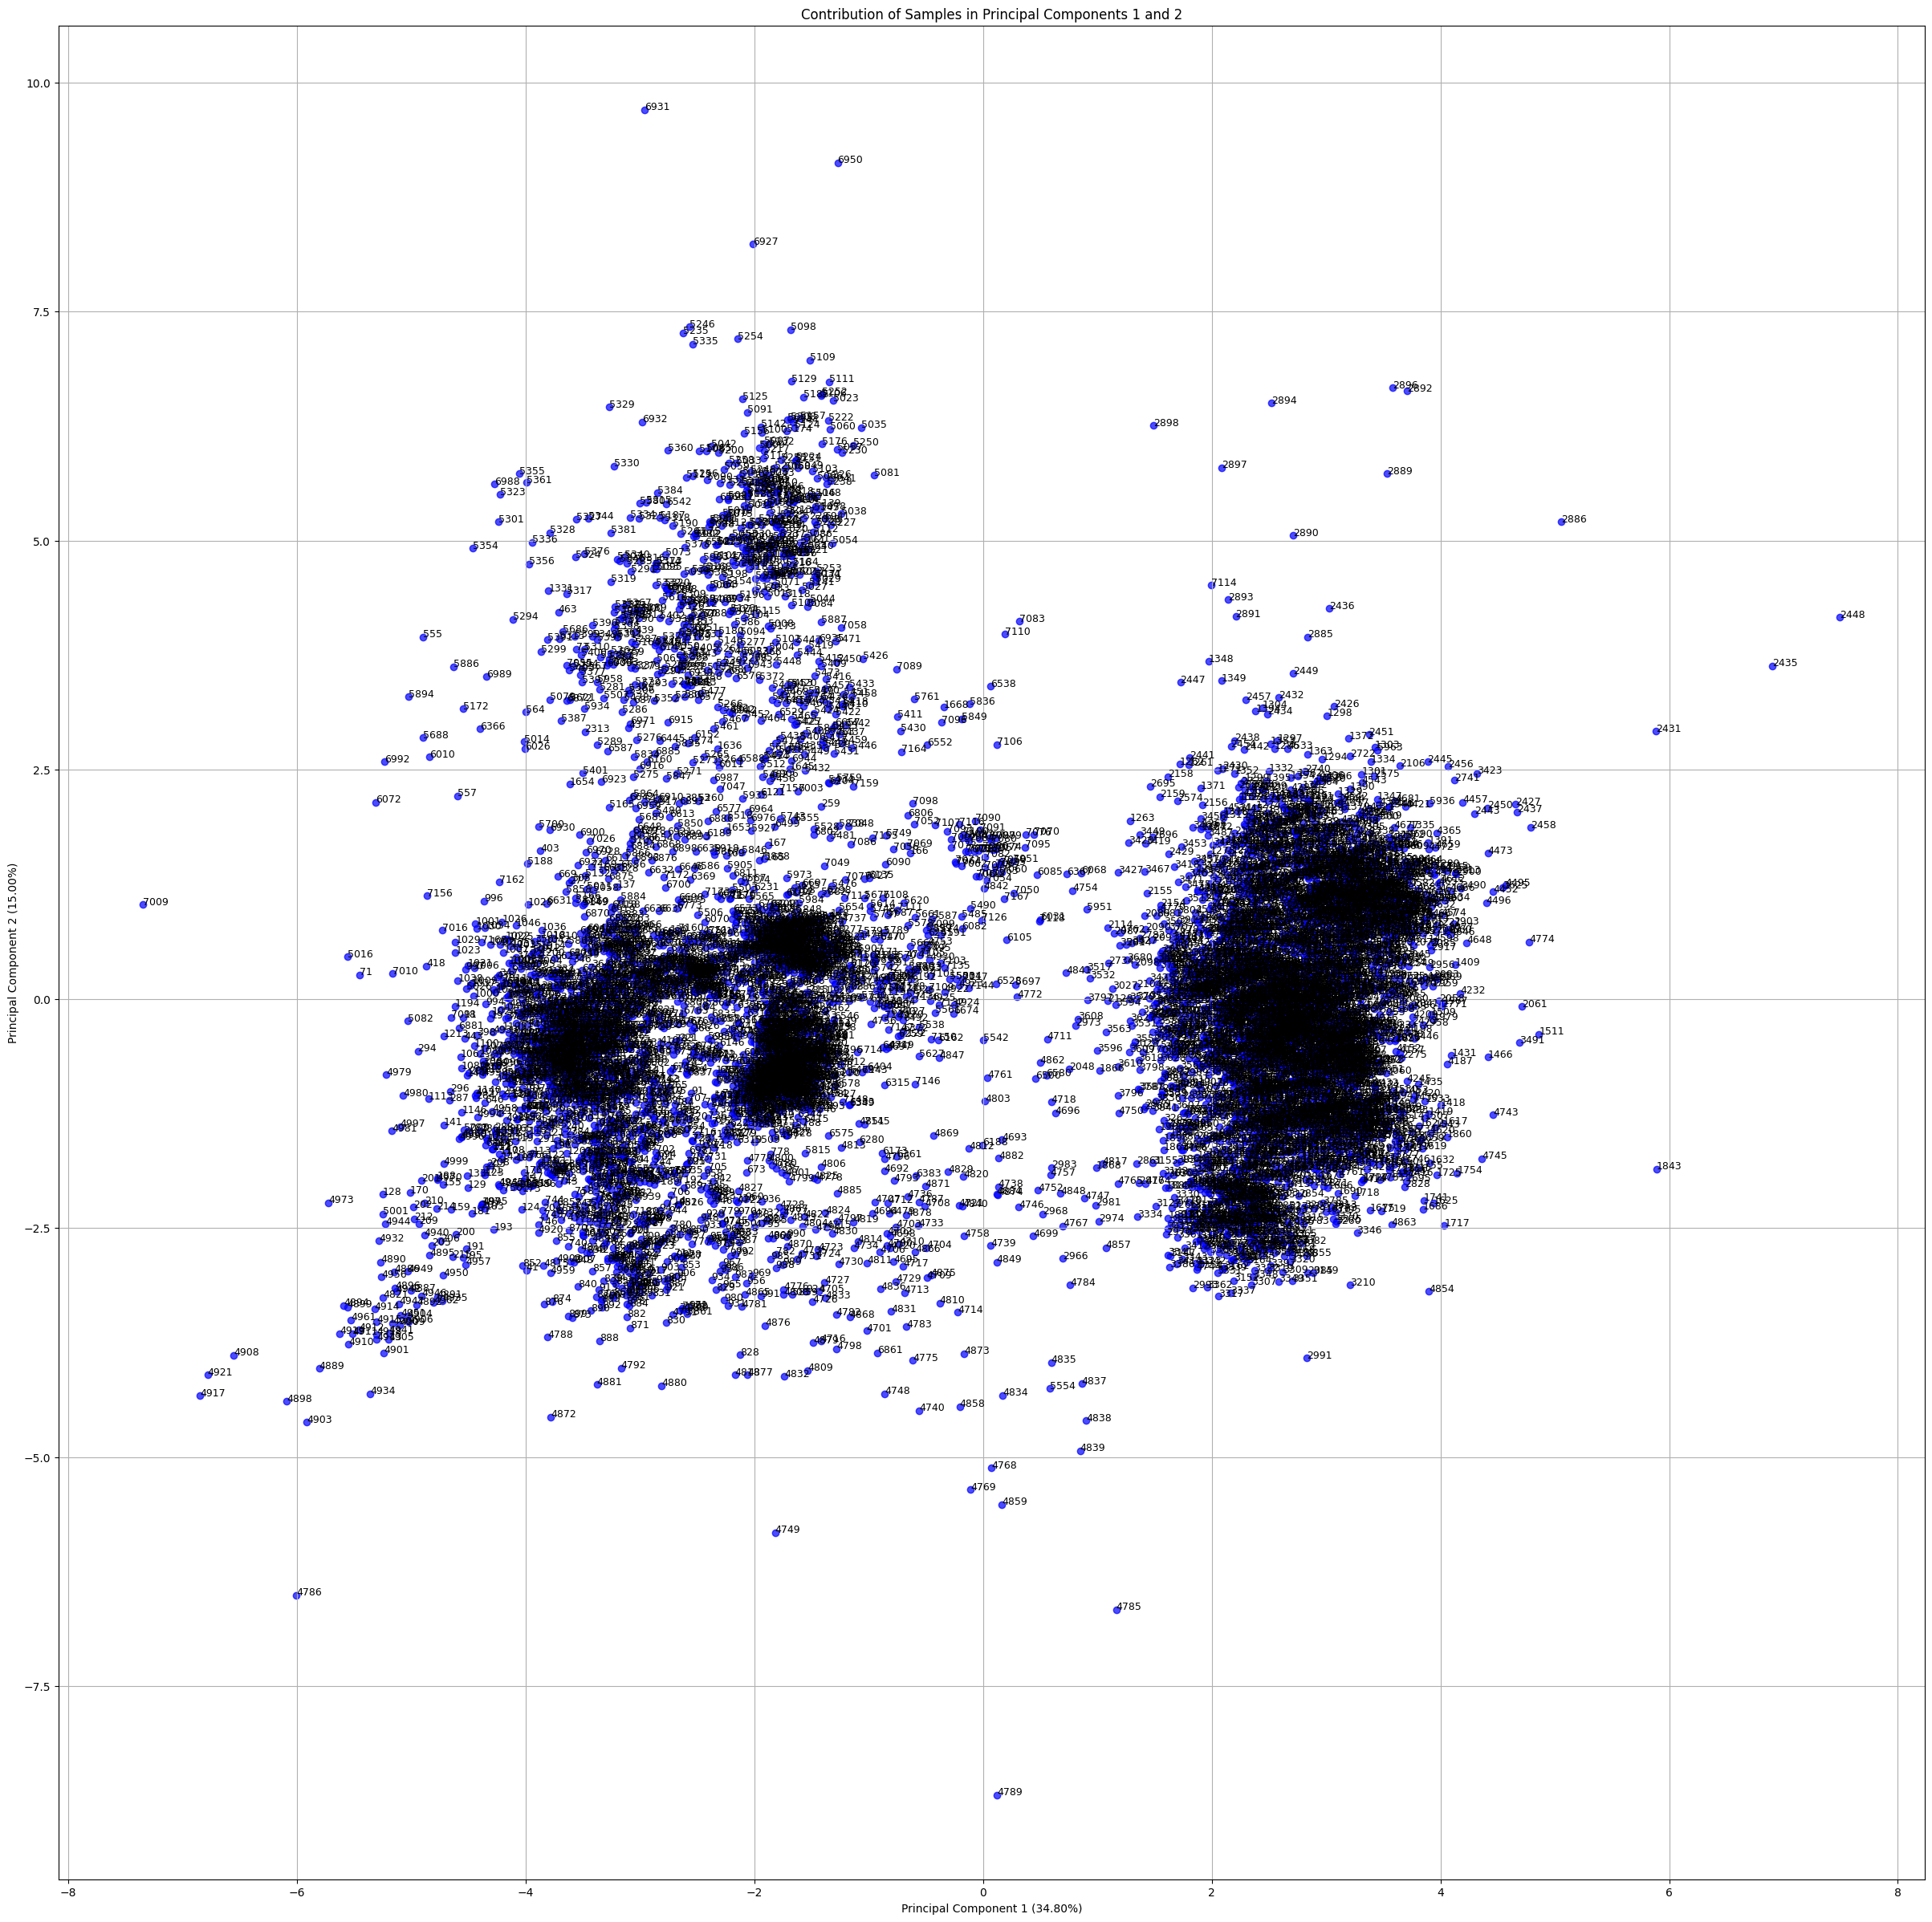

In [9]:
# Project the data onto the first two principal components
pca_components = pca.transform(scaled_data)

# Scatter plot showing the contribution of the first two principal components
plt.figure(figsize=(30,30))
plt.scatter(pca_components[:, 0], pca_components[:, 1], color='blue', alpha=0.7)

# Show index
for i, j in enumerate(data.index):  # Use enumerate to get index and value
    plt.text(pca_components[i, 0], pca_components[i, 1], j, fontsize=9)

# Labels and title
plt.xlabel(f"Principal Component 1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"Principal Component 2 ({explained_variance[1]*100:.2f}%)")
plt.title("Contribution of Samples in Principal Components 1 and 2")
plt.grid(True)

# Show the plot
plt.show()


#### Relationships Between Numeric Variables:
- The **Circle of Correlations** shows how each numeric variable contributes to each principal component.
    - **PC1** has significant contributions from `MFCCs_21`and `MFCCs_22`.
    - **PC2** is influenced by `MFCCs_7`, `MFCCs_5`, and `MFCCs_4`.

####  In the Component Scores Plot:
We observed that using only the first two principal components (PC1 and PC2), which together explain 48% of the total variance, does not capture enough of the dataset's underlying structure. While the first two components might offer some insight, they fail to provide a comprehensive representation of the data’s variability. This is especially important in complex datasets where higher-order components often account for critical patterns that cannot be explained by just the first two components.

To achieve a more accurate and meaningful representation of the data, it may be necessary to include additional components. Retaining more components will help ensure that a larger portion of the variance is captured, leading to a more complete understanding of the relationships between features in the dataset. Typically, retaining components that explain **at least 95%** of the total variance is considered a good practice, as this provides a balance between dimensionality reduction and retaining significant data patterns.

**We choose 12 principal components for our PCA analysis below.**

In [10]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# PCA Analysis
pca_12 = PCA(n_components=12) 
pca_12.fit(scaled_data)

PCA(n_components=12)

## **2. Are there relationships between the 22 numeric variables? Explain their relations.**
     
The correlation matrix reveals strong relationships among certain variables:
- Some pairs of variables exhibit high positive correlations (e.g., MFCCs_13 and MFCCs_17 with a correlation of 0.78).
- Others show negative correlations (e.g., MFCCs_13 and MFCCs_15 with a correlation of -0.90).

This indicates **redundancy**, where some variables provide overlapping information. PCA leverages these relationships to combine highly correlated features into fewer components.

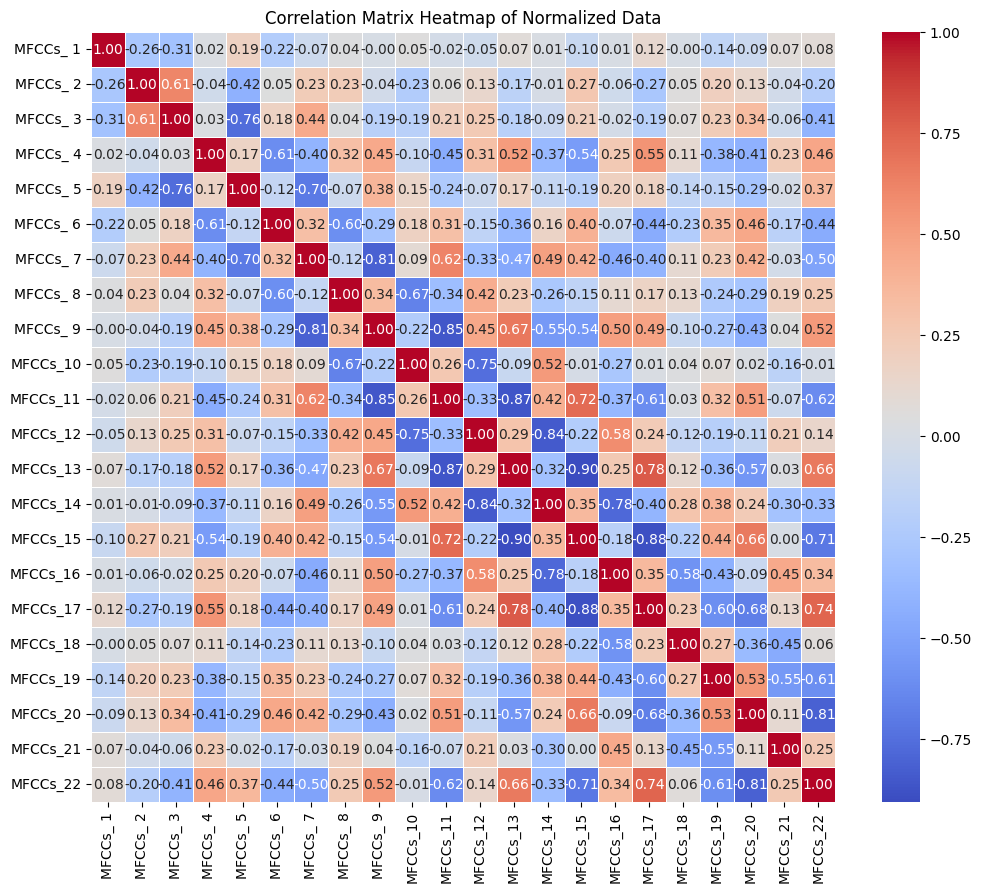

In [11]:
# Convert the scaled data back to a DataFrame with the same column names as the original data
numeric_data_scaled_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Compute the correlation matrix
correlation_matrix = numeric_data_scaled_df.corr()

# Plot the Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap of Normalized Data")
plt.show()

## **3. Characterize the qualitative variables based on the above analysis.**

### 1. Descriptive Analysis
Before proceeding with classification, explore the distributions and relationships between the three qualitative variables.

In [13]:
# We don't need the last column 'RecordID'.
T_table = data.iloc[:,22:25]
T_table

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraAndre
1,Leptodactylidae,Adenomera,AdenomeraAndre
2,Leptodactylidae,Adenomera,AdenomeraAndre
3,Leptodactylidae,Adenomera,AdenomeraAndre
4,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
7190,Hylidae,Scinax,ScinaxRuber
7191,Hylidae,Scinax,ScinaxRuber
7192,Hylidae,Scinax,ScinaxRuber
7193,Hylidae,Scinax,ScinaxRuber


In [14]:
# Frequency distribution for each qualitative variable
print("Frequency of Family:")
print(T_table['Family'].value_counts())

print("\nFrequency of Genus:")
print(T_table['Genus'].value_counts())

print("\nFrequency of Species:")
print(T_table['Species'].value_counts())


Frequency of Family:
Family
Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: count, dtype: int64

Frequency of Genus:
Genus
Adenomera        4150
Hypsiboas        1593
Ameerega          542
Dendropsophus     310
Leptodactylus     270
Scinax            148
Osteocephalus     114
Rhinella           68
Name: count, dtype: int64

Frequency of Species:
Species
AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672
Ameeregatrivittata         542
HypsiboasCinerascens       472
HylaMinuta                 310
LeptodactylusFuscus        270
ScinaxRuber                148
OsteocephalusOophagus      114
Rhinellagranulosa           68
Name: count, dtype: int64


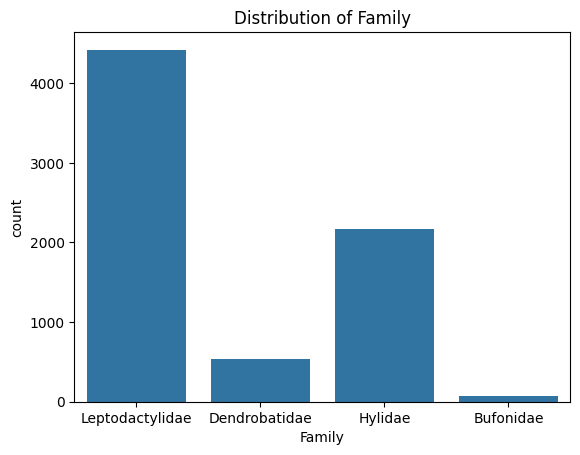

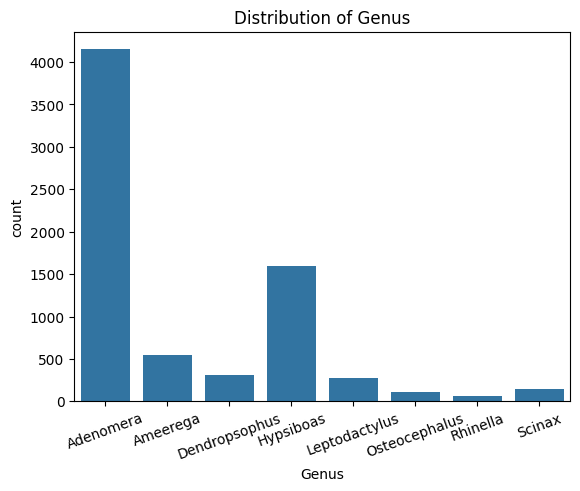

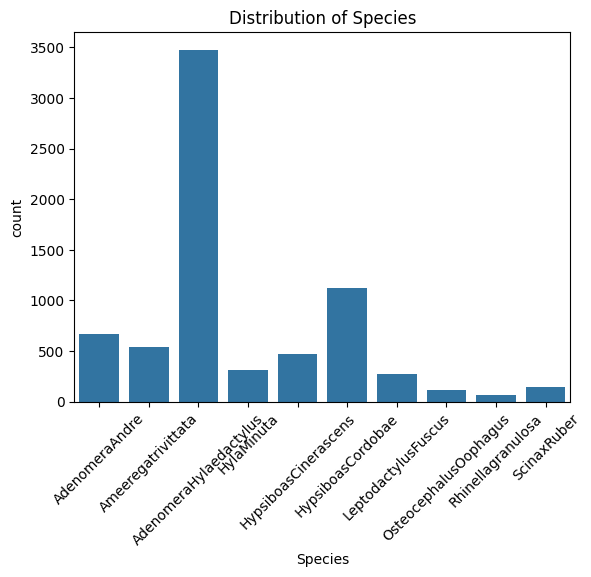

In [15]:
# Bar plot for Family
sns.countplot(data=T_table, x='Family')
plt.title('Distribution of Family')
plt.show()

# Bar plot for Genus
sns.countplot(data=T_table, x='Genus')
plt.title('Distribution of Genus')
plt.xticks(rotation=20)
plt.show()

# Bar plot for Species
sns.countplot(data=T_table, x='Species')
plt.title('Distribution of Species')
plt.xticks(rotation=45)
plt.show()


## 2. Inferential Analysis

### 2.0 Data Processing and Extraction:

**We choose 12 principal components for our PCA analysis.**

Principal Component Analysis (PCA) transforms the original numeric variables $X_1, X_2, \dots, X_{22}$ into a smaller number of uncorrelated principal components $Z_1, Z_2, \dots, Z_{12}\$, where each principal component is a weighted sum of the original variables. Mathematically, the transformation can be written as:

$$
Z_k = \sum_{i=1}^{22} w_{ki} X_i
$$

Where:
- $Z_k$ represents the \(k\)-th principal component. (for k = 1, 2, $\dots$, 12)
- $w_{ki}$ is the eigenvector coefficients (or weights) for the k-th principal component. (for i = 1, 2, $\dots$, 22)
- $X_i$ represents the original variables (in this case, the 22 numeric variables).



---

#### Summary:
- **From 22 numeric variables**: PCA reduces the dataset to **12 principal components** while retaining **95% of the variance** in the data.
- The weights $w_{ki}$ indicate how much each original variable contributes to a given principal component $Z_k$.
- This dimensionality reduction simplifies the analysis by reducing the number of variables while still capturing the majority of the data's variability.
- Reducing dimensions helps to mitigate redundancy, as some of the original numeric variables were highly correlated, indicating overlapping information.

#### The obtaining of the Principal components Z-table content

In [16]:
# Eigenvalues and Eigenvectors for 12 principal components
eigenvalues = pca_12.explained_variance_
eigenvectors = pca_12.components_


# Initialize the Z matrix (12 components x n Standardized samples)
Z = np.dot(scaled_data, eigenvectors.T)

# Z will have shape (n_samples, 12), where each column is one principal component
# This is the projection of the original data onto the first 12 principal components

# Print the results
Z_table = pd.DataFrame(Z, columns=[f'PC{i+1}' for i in range(Z.shape[1])])
Z_table

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-3.712956,-1.226478,-3.064140,0.640642,0.636511,0.072356,-0.839054,-0.042931,-0.485326,0.951407,0.124057,-0.535931
1,-3.724550,-1.545762,-3.244051,0.646757,0.329995,0.051510,-1.012958,1.029801,0.193533,0.803036,0.272098,-0.480914
2,-3.140749,-1.740167,-3.095270,1.190004,0.089326,-0.133926,-1.006392,1.450934,0.531989,0.591244,-0.413333,-0.260028
3,-3.532968,-1.760899,-3.468054,0.285448,-0.412578,-0.625354,-1.091074,0.929277,1.251550,-0.587596,2.016578,0.288611
4,-3.280591,-1.986265,-3.691547,1.258442,-0.139360,-0.231288,-1.102129,1.686699,0.595015,0.615655,-0.031200,0.107831
...,...,...,...,...,...,...,...,...,...,...,...,...
7190,-3.074746,-1.987734,-2.529745,-1.152360,0.303345,3.444928,-1.983464,-0.145614,-2.078740,-0.306053,-1.046896,1.408117
7191,-2.919222,-1.914616,-2.676608,-1.191422,0.435193,3.304709,-1.891589,-0.035618,-1.932778,-0.333229,-1.121472,1.384603
7192,-2.671663,-1.999559,-2.587433,-0.778914,0.428861,3.390884,-2.076949,0.001627,-2.057214,-0.395853,-1.150964,1.584043
7193,-3.004259,-1.997125,-2.519739,-1.221311,0.477421,3.275552,-1.895548,-0.084833,-1.856631,-0.521649,-1.193233,1.367933


### 2.1 Chi-Square Test
Check if there is a significant relationship between pairs of qualitative variables.

In [19]:
from scipy.stats import chi2_contingency

# Creating a contingency table for Family vs Genus and Species vs Genus
family_genus_ct = pd.crosstab(T_table['Family'], T_table['Genus'])
genus_species_ct = pd.crosstab(T_table['Species'], T_table['Genus'])

# Chi-square test for Family vs Genus
chi2, p, dof, expected = chi2_contingency(family_genus_ct)
print(f"Chi-square test (Family vs Genus): p-value = {p}")

# Chi-square test for Genus vs Species
chi2, p, dof, expected = chi2_contingency(genus_species_ct)
print(f"Chi-square test (Genus vs Species): p-value = {p}")


Chi-square test (Family vs Genus): p-value = 0.0
Chi-square test (Genus vs Species): p-value = 0.0


#### Interpretation:

The Chi-square test of independence tests the hypothesis that two categorical variables are independent (i.e., not related). The null hypothesis (H₀) for this test is that there is no association between the two variables, meaning they are independent. The alternative hypothesis (H₁) is that there is an association, meaning they are dependent.

- Null hypothesis (H₀): There is no relationship between the two variables (e.g., Family and Genus, or Genus and Species).
- Alternative hypothesis (H₁): There is a relationship between the two variables (e.g., Family and Genus, or Genus and Species).

Given that the p-value for both tests is 0.0, this means:

- There is very strong evidence to reject the null hypothesis, implying that Family and Genus are dependent (i.e., there is a significant relationship between them).
- Similarly, Genus and Species are also dependent, indicating a strong relationship between these two variables as well.

In practical terms, these results suggest that:

- Each Family in our dataset is likely associated with a specific Genus.
- Each Genus in our dataset is likely associated with a specific Species.

### 2.2 ANOVA (Principal Components and Qualitative Variables)

Assess if the principal components differ significantly between groups of qualitative variables.

In [20]:
from scipy.stats import f_oneway

# Example: ANOVA for PC1...12 and Family
for i in range(1, 13):  # Iterate over all 12 principal components
    f_stat, p_val = f_oneway(
        *[Z_table.loc[T_table['Family'] == group, f'PC{i}'] for group in T_table['Family'].unique()]
    )
    print(f"ANOVA for PC{i} and Family: p-value = {p_val:.5f}")


ANOVA for PC1 and Family: p-value = 0.00000
ANOVA for PC2 and Family: p-value = 0.00000
ANOVA for PC3 and Family: p-value = 0.00000
ANOVA for PC4 and Family: p-value = 0.00000
ANOVA for PC5 and Family: p-value = 0.00000
ANOVA for PC6 and Family: p-value = 0.00000
ANOVA for PC7 and Family: p-value = 0.00000
ANOVA for PC8 and Family: p-value = 0.00000
ANOVA for PC9 and Family: p-value = 0.00000
ANOVA for PC10 and Family: p-value = 0.00000
ANOVA for PC11 and Family: p-value = 0.00000
ANOVA for PC12 and Family: p-value = 0.00000


#### Conclusion:
Since the p-values are very small (0.00000), it indicates that:

For all principal components (PC1 to PC12), there is a significant association with the variable "Family".
This means the Family variable has a statistically **significant impact** on the principal components (PC1, PC2, ..., PC12), and that the variation in these principal components can be explained, at least in part, by differences in Family.

### 2.3 Classification Models
We choose Multiple Classification Tasks (Multitask Learning) due to the Three-Dimensional Nature of the T-Table.

In [21]:
from sklearn.model_selection import train_test_split

# Z_table is the DataFrame of 12 principal components
# T_table contains the qualitative variables (Family, Genus, Species)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    Z_table, T_table, test_size=0.2, random_state=42
)

# Print shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


X_train shape: (5756, 12)
y_train shape: (5756, 3)


#### Predict all three qualitative variables (Family, Genus, and Species) simultaneously:

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier

# Initialize multi-output classifier with random forest
multi_rf = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
multi_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_multi = multi_rf.predict(X_test)

# Evaluate the model
for i, target in enumerate(y_train.columns):
    print(f"Performance for {target}:")
    print(classification_report(y_test[target], y_pred_multi[:, i]))


Performance for Family:
                 precision    recall  f1-score   support

      Bufonidae       1.00      0.71      0.83        17
  Dendrobatidae       0.99      0.99      0.99       106
        Hylidae       0.97      0.98      0.98       422
Leptodactylidae       0.99      0.99      0.99       894

       accuracy                           0.99      1439
      macro avg       0.99      0.92      0.95      1439
   weighted avg       0.99      0.99      0.99      1439

Performance for Genus:
               precision    recall  f1-score   support

    Adenomera       0.99      0.99      0.99       840
     Ameerega       0.99      1.00      1.00       106
Dendropsophus       0.98      0.86      0.92        57
    Hypsiboas       0.95      1.00      0.97       321
Leptodactylus       0.98      1.00      0.99        54
Osteocephalus       1.00      0.60      0.75        20
     Rhinella       1.00      0.88      0.94        17
       Scinax       0.95      0.83      0.89        2

#### Interpretation of Performance Results:
- **Performance for "Family":**
    - Precision:

      The precision for most classes (e.g., Bufonidae, Dendrobatidae, etc.) is very high (>97%), meaning the model rarely misclassifies samples as belonging to a wrong family.
      For Bufonidae, the precision is perfect (1.00), indicating no false positives for this class.
      
    - Recall:

        Recall for Dendrobatidae, Hylidae, and Leptodactylidae is near-perfect (99%).
        Bufonidae has a recall of 71%, indicating some instances of this family were misclassified into other families.
      
    - F1-Score:

        The F1-scores for most families are very high (above 0.95), reflecting strong overall performance.
        The F1-score for Bufonidae is lower (0.83), likely due to its lower recall.
    - Macro Average:

        Macro averages give equal weight to all families and show the model performs slightly worse on smaller classes (e.g.,   Bufonidae), with an F1 of 0.95.
    - Weighted Average:

        Weighted metrics account for class sizes. The weighted F1 is almost perfect (0.99), showing excellent overall performance dominated by larger classes (Leptodactylidae, Hylidae).

        **Conclusion: The model performs very well on predicting "Family," but smaller classes like Bufonidae could benefit from more training data or fine-tuned modeling.**

- **Performance for "Genus":**
    - Precision and Recall:

        Precision and recall are very high for most genera like Adenomera and Ameerega (>99%).
        For smaller genera (Osteocephalus, Scinax), the recall drops significantly (e.g., 60% for Osteocephalus), indicating more misclassifications for these rare classes.
      
    - F1-Score:

        Most genera have F1-scores near or above 0.95.
        Dendropsophus, Osteocephalus, and Scinax have F1-scores below 0.90, reflecting difficulties with these smaller or more overlapping classes.

    - Macro and Weighted Averages:

        The macro F1 (0.93) is slightly lower, indicating the model struggles more with small or rare classes.
        The weighted F1 (0.98) remains high due to dominance by large genera like Adenomera.


      **Conclusion: The model performs excellently on "Genus" overall, but accuracy for smaller or rarer genera needs improvement.**

- **Performance for "Species":**
    - Precision:

        Precision for most species is excellent (>95%), showing the model effectively distinguishes between species.
        Precision is slightly lower for ScinaxRuber (0.91), indicating occasional misclassification into other species.
      
    - Recall:

        Recall is excellent for species like AdenomeraHylaedactylus (1.00) and LeptodactylusFuscus (1.00).
        Recall is lower for smaller classes like HylaMinuta (82%) and OsteocephalusOophagus (80%).
 
      
    - F1-Score:

        The F1-scores for most species are above 0.90, with occasional dips for rare or small species (e.g., HylaMinuta, OsteocephalusOophagus).
 
      
    - Macro and Weighted Averages:

        The macro F1 (0.95) reflects some struggles with smaller species.
        The weighted F1 (0.98) is excellent, as larger species dominate performance metrics.

        **Conclusion: The model effectively predicts "Species," with occasional difficulties for rare species.**



### 4. Clustering Analysis

Group similar samples based on the principal components.


#### K-Means Clustering
Cluster samples using principal components and check if clusters align with qualitative variables.

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Perform K-means clustering with the number of clusters equal to the number of Families
kmeans = KMeans(n_clusters=len(T_table['Family'].unique()), random_state=42)
kmeans_labels = kmeans.fit_predict(Z_table)

# Compare clusters with actual Family labels
print(f"Adjusted Rand Index (Family): {adjusted_rand_score(T_table['Family'], kmeans_labels):.2f}")


Adjusted Rand Index (Family): 0.50


  File "c:\users\qzj\appdata\local\programs\python\python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\users\qzj\appdata\local\programs\python\python39\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\users\qzj\appdata\local\programs\python\python39\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\users\qzj\appdata\local\programs\python\python39\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
